In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('EPSG32756_Date20230501_Lat-33.775352_Lon151.122043_Mpp1.194.jpg')

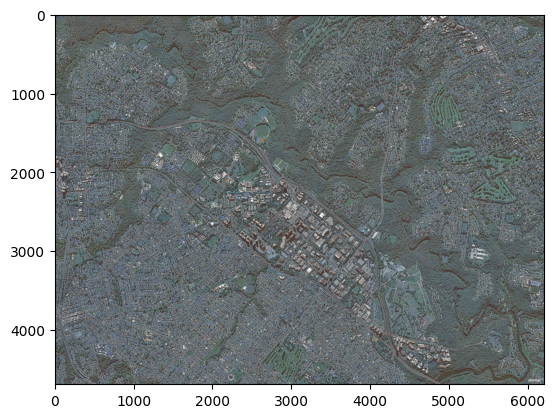

In [3]:
plt.imshow(img)
plt.show()

In [4]:
np.shape(img)[:2]

(4690, 6207)

In [5]:
new_shape = np.array((6207*1.194329//2, 4690*1.194329//2), dtype=int)

In [6]:
new_shape

array([3706, 2800])

In [7]:
rescaled = cv2.resize(img, dsize=new_shape, interpolation=cv2.INTER_CUBIC)

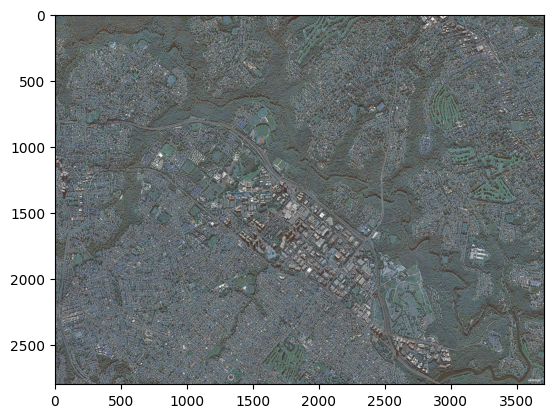

In [8]:
plt.imshow(rescaled)
plt.show()

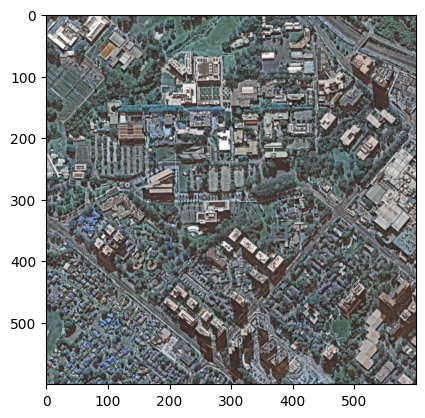

In [9]:
plt.imshow(rescaled[1200:1800, 1200:1800])
plt.show()

In [10]:
# Coordinates of the top left pixel:
x_coordinate = 322400.236553
y_coordinate = 6263966.897408

In [11]:
np.shape(rescaled)

(2800, 3706, 3)

In [47]:
print(2800*2/10)
print(3706*2/10)

560.0
741.2


# Also get the coordinates for the low-res Sentinel images

In [12]:
import rasterio
from rasterio.crs import CRS
from rasterio import warp
from rasterio.windows import Window
from pyproj import Proj
from math import floor, ceil

In [13]:
img_date = "S2B_20231012"
path_B02 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B02_10m.jp2"
path_B03 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B03_10m.jp2"
path_B04 = "../../../Sentinel images/MQ/"+img_date+"/GRANULE/L2A/IMG_DATA/R10m/B04_10m.jp2"

In [14]:
with rasterio.open(path_B02) as src:
    # Get metadata
    metadata = src.meta

    # Accessing metadata to get geospatial information
    print("Image Width:", metadata['width'])
    print("Image Height:", metadata['height'])
    print("Image CRS (Coordinate Reference System):", metadata['crs'])
    print("Image Transform (Affine matrix for georeferencing):", metadata['transform'])

Image Width: 10980
Image Height: 10980
Image CRS (Coordinate Reference System): EPSG:32756
Image Transform (Affine matrix for georeferencing): | 10.00, 0.00, 300000.00|
| 0.00,-10.00, 6300040.00|
| 0.00, 0.00, 1.00|


In [7]:
# Replace these with the pixel coordinates you're interested in
pixel_x = 0
pixel_y = 0

# Transform pixel coordinates to GPS coordinates
lon, lat = src.transform * (pixel_x, pixel_y)
print("GPS Coordinates (Longitude, Latitude):", lon, lat)

GPS Coordinates (Longitude, Latitude): 300000.0 6300040.0


In [15]:
# Replace these with the pixel coordinates you're interested in
pixel_x = 2240
pixel_y = 3607

# Transform pixel coordinates to GPS coordinates
lon, lat = src.transform * (pixel_x, pixel_y)
print("GPS Coordinates (Longitude, Latitude):", lon, lat)

GPS Coordinates (Longitude, Latitude): 322400.0 6263970.0


In [16]:
with rasterio.open(path_B02) as src:
    arr_B02 = src.read(1)
    
with rasterio.open(path_B03) as src:
    arr_B03 = src.read(1)
    
with rasterio.open(path_B04) as src:
    arr_B04 = src.read(1)

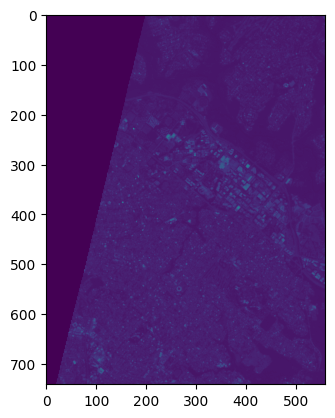

In [17]:
plt.imshow(arr_B02[3607:3607+741,2240:2240+560])
plt.show()

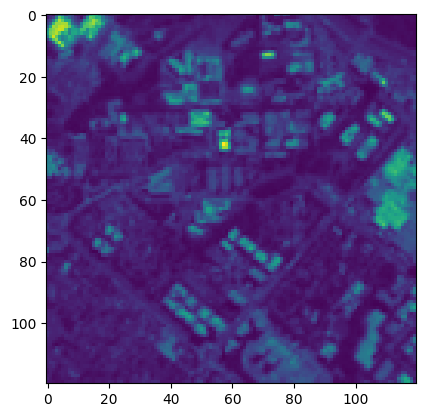

In [52]:
plt.imshow(arr_B02[3607+240:3607+360,2240+240:2240+360])
plt.show()